# Model for predict is pumpkin is gosth or not

In [1]:
import pandas as pd
import numpy as np

full_pumpkins = pd.read_csv('../data/US-pumpkins.csv')

full_pumpkins.head()


,City Name,Type,Package,Variety,Sub Variety,Grade,Date,Low Price,High Price,Mostly Low,...,Unit of Sale,Quality,Condition,Appearance,Storage,Crop,Repack,Trans Mode,Unnamed: 24,Unnamed: 25
0,BALTIMORE,NaN,24 inch bins,NaN,NaN,NaN,4/29/17,270.0,280.0,270.0,...,NaN,NaN,NaN,NaN,NaN,NaN,E,NaN,NaN,NaN
1,BALTIMORE,NaN,24 inch bins,NaN,NaN,NaN,5/6/17,270.0,280.0,270.0,...,NaN,NaN,NaN,NaN,NaN,NaN,E,NaN,NaN,NaN
2,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,9/24/16,160.0,160.0,160.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
3,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,9/24/16,160.0,160.0,160.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
4,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,11/5/16,90.0,100.0,90.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN


## Basic Model

This is the model develop in class, I will compare the results with my model, that consider all new data.

In [57]:
columns_to_select = ['City Name','Package','Variety', 'Origin','Item Size', 'Color']
pumpkins_bas = full_pumpkins.loc[:, columns_to_select]

pumpkins_bas.dropna(inplace=True)

### Ordinal encoding

In [58]:
from sklearn.preprocessing import OrdinalEncoder

item_size_categories = [['sml', 'med', 'med-lge', 'lge', 'xlge', 'jbo', 'exjbo']]
ordinal_features = ['Item Size']
ordinal_encoder = OrdinalEncoder(categories=item_size_categories)

### Categorical encoder

In [59]:
from sklearn.preprocessing import OneHotEncoder

categorical_features = ['City Name', 'Package', 'Variety', 'Origin']
categorical_encoder = OneHotEncoder(sparse_output=False)

### Pipeline

In [60]:
from sklearn.compose import ColumnTransformer

ct = ColumnTransformer(transformers=[
    ('ord', ordinal_encoder, ordinal_features),
    ('cat', categorical_encoder, categorical_features)
    ])

ct.set_output(transform='pandas')
encoded_features = ct.fit_transform(pumpkins_bas)

### Target Encoding (**Label** encoder)

In [61]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
encoded_label = label_encoder.fit_transform(pumpkins_bas['Color'])

In [62]:
encoded_pumpkins_bas = encoded_features.assign(Color=encoded_label)

In [63]:
list(label_encoder.inverse_transform([0,1]))

['ORANGE', 'WHITE']

In [64]:
from sklearn.model_selection import train_test_split

X = encoded_pumpkins_bas[encoded_pumpkins_bas.columns.difference(['Color'])]
y = encoded_pumpkins_bas['Color']

X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(X, y, test_size=0.2, random_state=0)


In [65]:
from sklearn.metrics import f1_score, classification_report 
from sklearn.linear_model import LogisticRegression

model_bas = LogisticRegression()
model_bas.fit(X_train_b, y_train_b)

LogisticRegression()

In [67]:
predictions_b = model_bas.predict(X_test_b)
print(classification_report(y_test_b, predictions_b))
print('F1-score: ', f1_score(y_test_b, predictions_b))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96       166
           1       0.85      0.67      0.75        33

    accuracy                           0.92       199
   macro avg       0.89      0.82      0.85       199
weighted avg       0.92      0.92      0.92       199

F1-score:  0.7457627118644068


### ROC model base

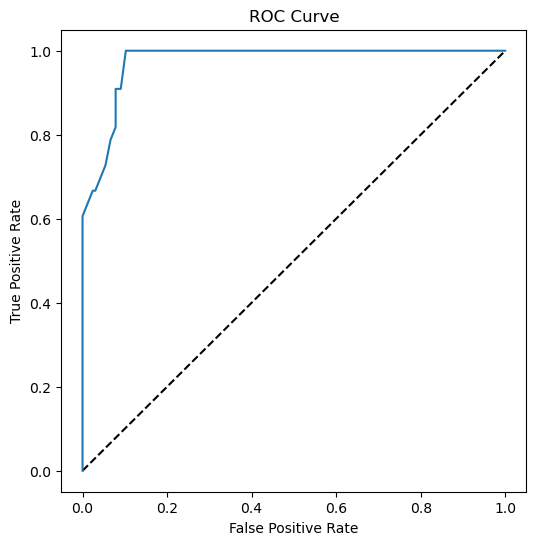

In [68]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

y_scores_b = model_bas.predict_proba(X_test_b)
fpr_b, tpr_b, thresholds_b = roc_curve(y_test_b, y_scores_b[:,1])

fig = plt.figure(figsize=(6, 6))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_b, tpr_b)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [69]:
auc_b = roc_auc_score(y_test_b,y_scores_b[:,1])
print(auc_b)

0.9749908725812341


## Model Train with all the data.


In [36]:
full_pumpkins.head(10)

,City Name,Type,Package,Variety,Sub Variety,Grade,Date,Low Price,High Price,Mostly Low,...,Unit of Sale,Quality,Condition,Appearance,Storage,Crop,Repack,Trans Mode,Unnamed: 24,Unnamed: 25
0,BALTIMORE,NaN,24 inch bins,NaN,NaN,NaN,4/29/17,270.0,280.0,270.0,...,NaN,NaN,NaN,NaN,NaN,NaN,E,NaN,NaN,NaN
1,BALTIMORE,NaN,24 inch bins,NaN,NaN,NaN,5/6/17,270.0,280.0,270.0,...,NaN,NaN,NaN,NaN,NaN,NaN,E,NaN,NaN,NaN
2,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,9/24/16,160.0,160.0,160.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
3,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,9/24/16,160.0,160.0,160.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
4,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,11/5/16,90.0,100.0,90.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
5,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,11/12/16,90.0,100.0,90.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
6,BALTIMORE,NaN,36 inch bins,HOWDEN TYPE,NaN,NaN,9/24/16,160.0,170.0,160.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
7,BALTIMORE,NaN,36 inch bins,HOWDEN TYPE,NaN,NaN,9/24/16,160.0,160.0,160.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
8,BALTIMORE,NaN,36 inch bins,HOWDEN TYPE,NaN,NaN,10/1/16,160.0,170.0,160.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
9,BALTIMORE,NaN,36 inch bins,HOWDEN TYPE,NaN,NaN,10/1/16,160.0,160.0,160.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN


In [38]:
full_pumpkins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1757 entries, 0 to 1756
Data columns (total 26 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   City Name        1757 non-null   object 
 1   Type             45 non-null     object 
 2   Package          1757 non-null   object 
 3   Variety          1752 non-null   object 
 4   Sub Variety      296 non-null    object 
 5   Grade            0 non-null      float64
 6   Date             1757 non-null   object 
 7   Low Price        1757 non-null   float64
 8   High Price       1757 non-null   float64
 9   Mostly Low       1654 non-null   float64
 10  Mostly High      1654 non-null   float64
 11  Origin           1754 non-null   object 
 12  Origin District  131 non-null    object 
 13  Item Size        1478 non-null   object 
 14  Color            1141 non-null   object 
 15  Environment      0 non-null      float64
 16  Unit of Sale     162 non-null    object 
 17  Quality       

In [15]:
columns_na_val = full_pumpkins.isna().sum().sort_values()
columns_na = pd.DataFrame(columns_na_val).reset_index()
columns_na

,index,0
0,City Name,0
1,Repack,0
2,Package,0
3,Date,0
4,Low Price,0
5,High Price,0
6,Origin,3
7,Variety,5
8,Mostly Low,103
9,Mostly High,103


In [16]:
columns_na_list = columns_na[columns_na.iloc[:,1]<1000]
colums_conserve = list(columns_na_list.iloc[:,0])
colums_conserve

['City Name',
 'Repack',
 'Package',
 'Date',
 'Low Price',
 'High Price',
 'Origin',
 'Variety',
 'Mostly Low',
 'Mostly High',
 'Item Size',
 'Color']

In [44]:
full_pumpkins.columns

Index(['City Name', 'Type', 'Package', 'Variety', 'Sub Variety', 'Grade',
       'Date', 'Low Price', 'High Price', 'Mostly Low', 'Mostly High',
       'Origin', 'Origin District', 'Item Size', 'Color', 'Environment',
       'Unit of Sale', 'Quality', 'Condition', 'Appearance', 'Storage', 'Crop',
       'Repack', 'Trans Mode', 'Unnamed: 24', 'Unnamed: 25'],
      dtype='object')

### Cleaning data

In [17]:
# Drop all columns with all data in NaN
pumpkins = full_pumpkins.loc[:,colums_conserve]


In [19]:
# Drop all rows with no values

pumpkins.dropna(inplace = True)

In [20]:
pumpkins.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 946 entries, 2 to 1624
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   City Name    946 non-null    object 
 1   Repack       946 non-null    object 
 2   Package      946 non-null    object 
 3   Date         946 non-null    object 
 4   Low Price    946 non-null    float64
 5   High Price   946 non-null    float64
 6   Origin       946 non-null    object 
 7   Variety      946 non-null    object 
 8   Mostly Low   946 non-null    float64
 9   Mostly High  946 non-null    float64
 10  Item Size    946 non-null    object 
 11  Color        946 non-null    object 
dtypes: float64(4), object(8)
memory usage: 96.1+ KB


## Encoding data.

In [21]:
pumpkins.head()

,City Name,Repack,Package,Date,Low Price,High Price,Origin,Variety,Mostly Low,Mostly High,Item Size,Color
2,BALTIMORE,N,24 inch bins,9/24/16,160.0,160.0,DELAWARE,HOWDEN TYPE,160.0,160.0,med,ORANGE
3,BALTIMORE,N,24 inch bins,9/24/16,160.0,160.0,VIRGINIA,HOWDEN TYPE,160.0,160.0,med,ORANGE
4,BALTIMORE,N,24 inch bins,11/5/16,90.0,100.0,MARYLAND,HOWDEN TYPE,90.0,100.0,lge,ORANGE
5,BALTIMORE,N,24 inch bins,11/12/16,90.0,100.0,MARYLAND,HOWDEN TYPE,90.0,100.0,lge,ORANGE
6,BALTIMORE,N,36 inch bins,9/24/16,160.0,170.0,MARYLAND,HOWDEN TYPE,160.0,170.0,med,ORANGE


Ordinal encoders:
- Package
- Item Size

Categorical encoders:
- City Name
- Repack
- Origin
- Variety

To Tranform: 
- Date (Probably to Day of the Year)


In [22]:
# Transform date (mm/dd/yy) to day of year (0-364)
from datetime import datetime
###
pumpkins.Date = pd.to_datetime(pumpkins['Date']).apply(lambda dt: (dt-datetime(dt.year,1,1)).days)
###

### Ordinal encoders

In [23]:
pumpkins.Package.unique().tolist()

['24 inch bins',
 '36 inch bins',
 '1 1/9 bushel cartons',
 '1/2 bushel cartons',
 '1 1/9 bushel crates',
 'bushel cartons',
 'bins']

Order of sizes: 

- Bins: These are likely the most spacious containers you have and can hold a large quantity of pumpkins.
- 36 inch bins: These bigger bins can hold more pumpkins than the 24-inch ones.
- 24 inch bins: Suitable for medium-sized pumpkins or large quantities of smaller pumpkins.
- 1 1/9 bushel cartons: These can hold a decent amount of pumpkins, with a volume of about 1.125 bushels.
- Bushel cartons: Standard bushel cartons, with a volume of roughly 1 bushel.
- 1/2 bushel cartons: Ideal for medium-sized pumpkins or smaller ones if you need to transport a large quantity.
- 1 1/9 bushel crates: These are likely the smallest containers on this list and are best suited for smaller pumpkins.

This order considers the volume of each container, with bins offering the most space and crates being the most confined.

In [24]:
from sklearn.preprocessing import OrdinalEncoder

item_size_categories = [['sml', 'med', 'med-lge', 'lge', 'xlge', 'jbo', 'exjbo']]
size_features = ['Item Size']

size_encoder = OrdinalEncoder(categories= item_size_categories)

package_size_categories = [['1 1/9 bushel crates','1/2 bushel cartons','bushel cartons',
                            '1 1/9 bushel cartons','24 inch bins','36 inch bins','bins']]

package_features = ['Package']
package_encoder = OrdinalEncoder(categories= package_size_categories)

In [28]:
# from sklearn.preprocessing import OrdinalEncoder

# ord_item_size_categories = [['sml', 'med', 'med-lge', 'lge', 'xlge', 'jbo', 'exjbo']]
# ord_package_size_categories = [['1 1/9 bushel crates','1/2 bushel cartons','bushel cartons',
#                             '1 1/9 bushel cartons','24 inch bins','36 inch bins','bins']]

# ordinal_features = ['Item Size','Package']

# ordinal_encoder = OrdinalEncoder(categories= [ord_item_size_categories,ord_package_size_categories])


### Categorical encoders

In [44]:
from sklearn.preprocessing import OneHotEncoder

categorical_features = ['City Name','Package', 'Repack', 'Variety', 'Origin']
categorical_encoder = OneHotEncoder(sparse_output=False)

In [45]:
from sklearn.compose import ColumnTransformer
    
ct = ColumnTransformer(transformers=[
    ('ord1', size_encoder, size_features),
    ('cat', categorical_encoder, categorical_features)
    ])

ct.set_output(transform='pandas')
encoded_features = ct.fit_transform(pumpkins)


# from sklearn.compose import ColumnTransformer
    
# ct = ColumnTransformer(transformers=[
#     ('ord1', size_encoder, size_features),
#     ('ord2', package_encoder, package_features),
#     ('cat', categorical_encoder, categorical_features)
#     ])

# ct.set_output(transform='pandas')
# encoded_features = ct.fit_transform(pumpkins)

In [46]:
encoded_features

,ord1__Item Size,cat__City Name_ATLANTA,cat__City Name_BALTIMORE,cat__City Name_BOSTON,cat__City Name_CHICAGO,cat__City Name_COLUMBIA,cat__City Name_DALLAS,cat__City Name_DETROIT,cat__City Name_LOS ANGELES,cat__City Name_MIAMI,...,cat__Origin_MICHIGAN,cat__Origin_NEW JERSEY,cat__Origin_NEW YORK,cat__Origin_NORTH CAROLINA,cat__Origin_OHIO,cat__Origin_PENNSYLVANIA,cat__Origin_TENNESSEE,cat__Origin_TEXAS,cat__Origin_VERMONT,cat__Origin_VIRGINIA
2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,3.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,3.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1620,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1621,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1622,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1623,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


The below code isnpnt work.

ct = ColumnTransformer(transformers=[
        ('ord', ordinal_encoder, ordinal_features),
        ('cat', categorical_encoder, categorical_features)
        ])
    
ct.set_output(transform='pandas')
encoded_features = ct.fit_transform(pumpkins)

### Add the target value


In [47]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
encoded_label = label_encoder.fit_transform(pumpkins['Color'])

In [48]:
encoded_pumpkins = encoded_features.assign(Color=encoded_label)

In [49]:
list(label_encoder.inverse_transform([0,1]))

['ORANGE', 'WHITE']

## Train the new model

In [50]:
from sklearn.model_selection import train_test_split

X = encoded_pumpkins[encoded_pumpkins.columns.difference(['Color'])]
y = encoded_pumpkins['Color']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [51]:
from sklearn.metrics import f1_score, classification_report 
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [52]:
predictions = model.predict(X_test)
print(classification_report(y_test, predictions))
print('F1-score: ', f1_score(y_test, predictions))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       170
           1       0.88      0.75      0.81        20

    accuracy                           0.96       190
   macro avg       0.93      0.87      0.90       190
weighted avg       0.96      0.96      0.96       190

F1-score:  0.8108108108108109


## ROC Curve

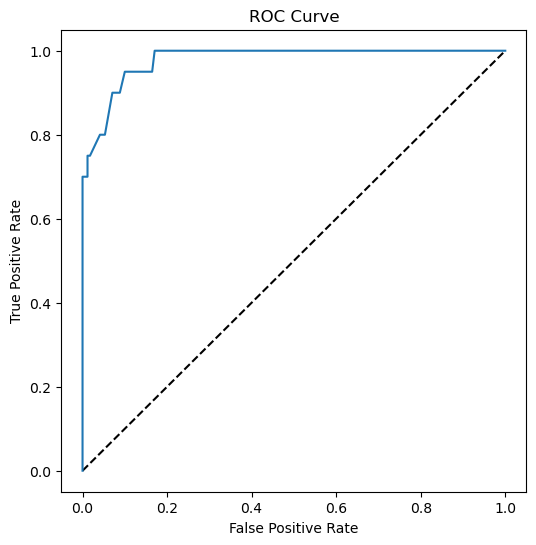

In [53]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

# Return the probabilty if the object is clasified like 
# 0 or 1 in an arry on 2 classes.
y_scores = model.predict_proba(X_test) 

# roc need y_true (y_test) and y_score (prob of be 1 from y_scores = y_scores[:,1])
fpr, tpr, thresholds = roc_curve(y_test, y_scores[:,1])

# returns fpr False positive ratio
# tpr = True positive ratio
# thesholds = Decreasing thresholds(umbrales decresientes) on the decision
# function used to compute fpr and tpr (From 1 to 0 aprox).
# thresholds[0] represents no instances
# being predicted and is arbitrarily set to np.inf.

fig = plt.figure(figsize=(6, 6))
plt.plot([0, 1], [0, 1], 'k--')

plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [54]:
auc = roc_auc_score(y_test,y_scores[:,1])
print(auc)

0.9786764705882353


# Comparsion between models

## ROC curve

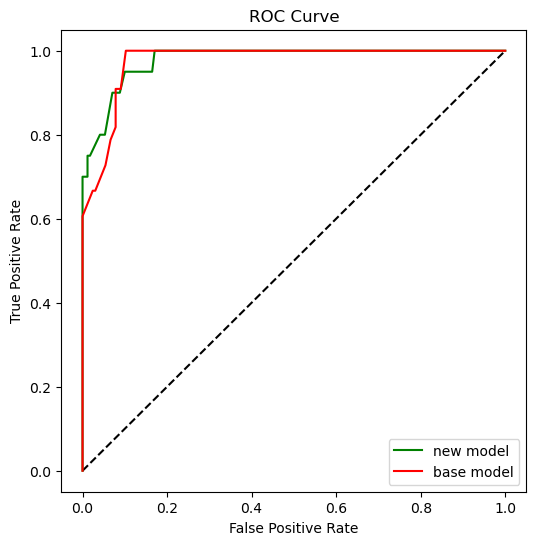

In [73]:
fig = plt.figure(figsize=(6, 6))
plt.plot([0, 1], [0, 1], 'k--')

plt.plot(fpr, tpr,'green', label = 'new model')
plt.plot(fpr_b, tpr_b, 'red', label = 'base model')
plt.legend()

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

## AOC

In [75]:
print(f"The AOC base model is: {auc_b:.5f} \nThe AOC new model is: {auc:.5f}")

The AOC base model is: 0.97499 
The AOC new model is: 0.97868


## Metrics

In [76]:
print(classification_report(y_test_b, predictions_b))
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96       166
           1       0.85      0.67      0.75        33

    accuracy                           0.92       199
   macro avg       0.89      0.82      0.85       199
weighted avg       0.92      0.92      0.92       199

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       170
           1       0.88      0.75      0.81        20

    accuracy                           0.96       190
   macro avg       0.93      0.87      0.90       190
weighted avg       0.96      0.96      0.96       190



# Conclusion

The new model is better, comparig AUC adn paremeters like Precision Recall and f1-Score.